Shape of dataset: (223, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  223 non-null    int64  
 1   StepCount   223 non-null    int64  
 2   Kcal        223 non-null    int64  
 3   Miles       223 non-null    float64
 4   Weather     223 non-null    object 
 5   Day         223 non-null    object 
 6   Walk        223 non-null    int64  
 7   Steps       223 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 14.1+ KB
None

Preview of data:
   Unnamed: 0  StepCount  Kcal  Miles Weather Day  Walk  Steps
0           1       2615     8    1.4   shine   F     0  2.615
1           2       3323    12    1.8   shine   S     0  3.323
2           3       2721    13    1.4   shine   U     0  2.721
3           4       2454    12    1.3   shine   M     0  2.454
4           5       5528   152    3.1    cold   T  

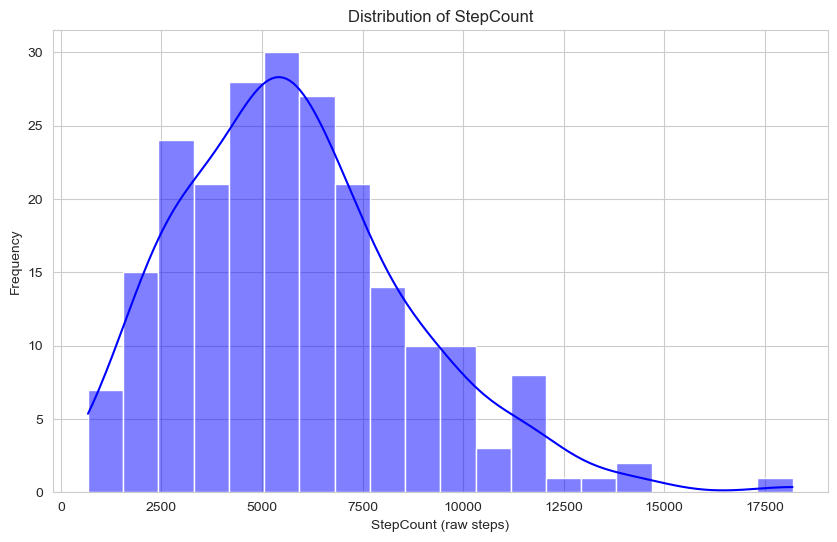

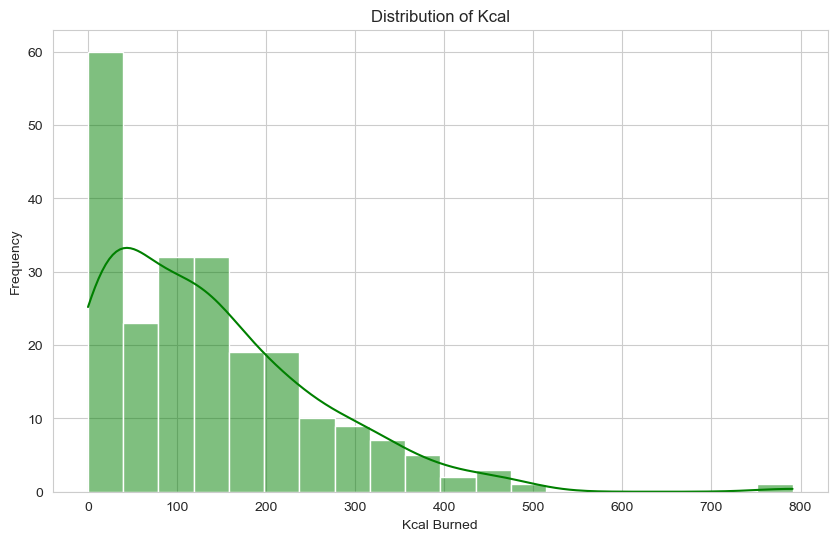

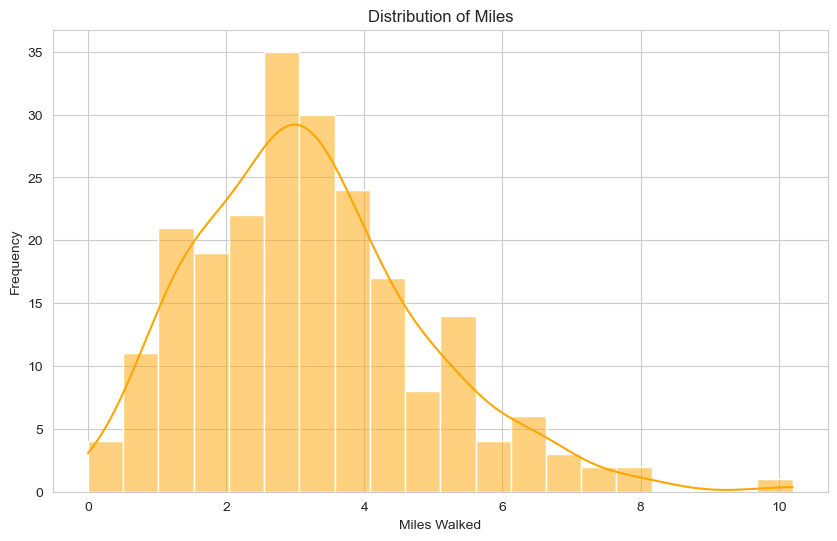

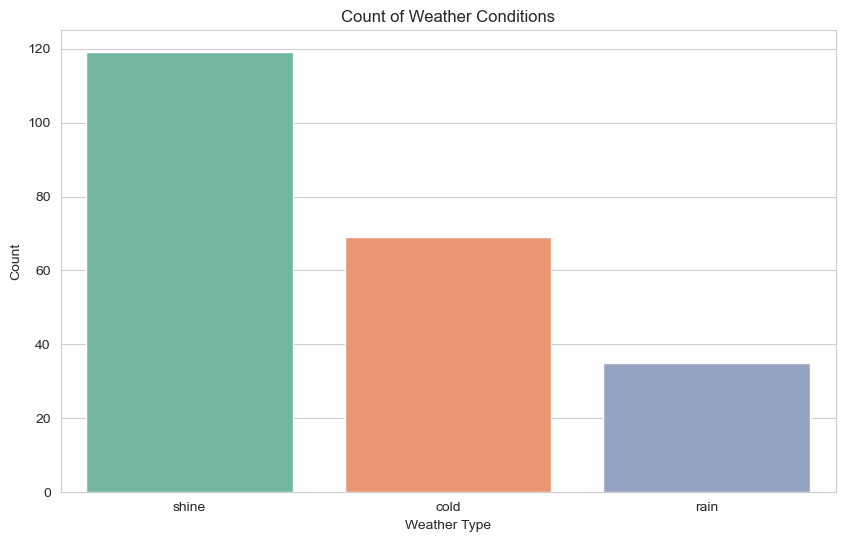

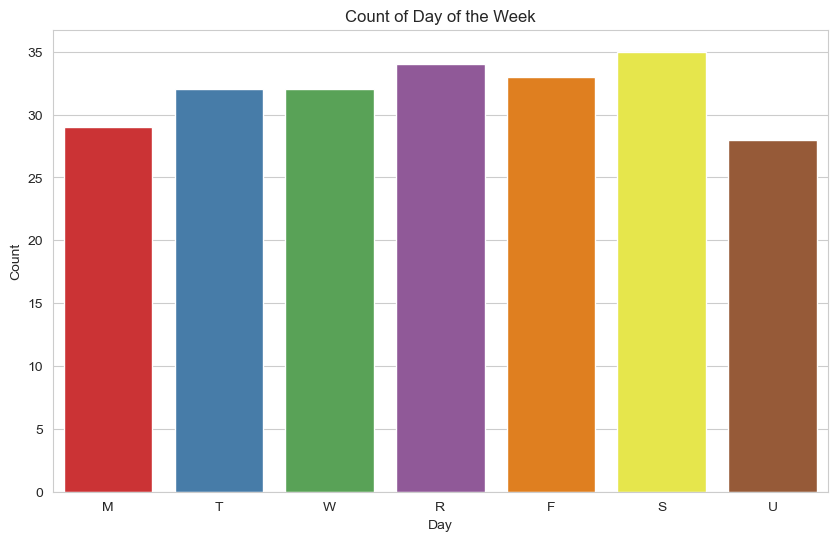

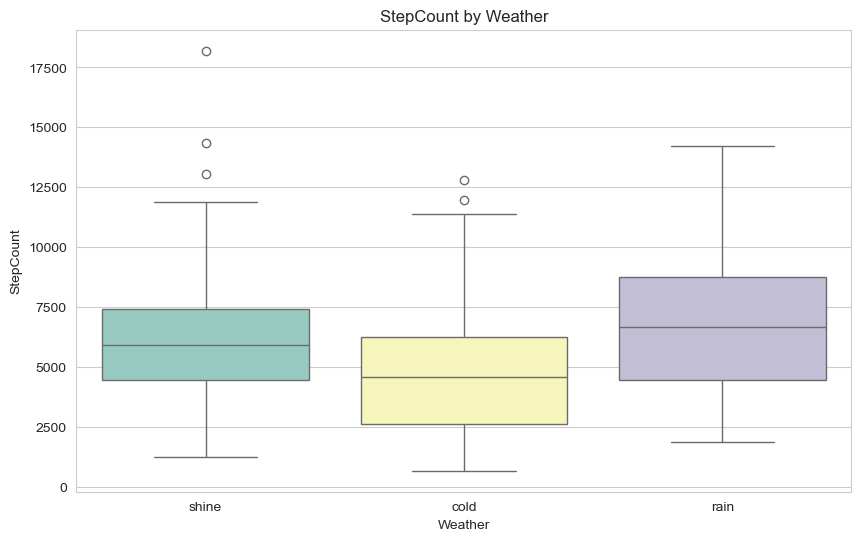

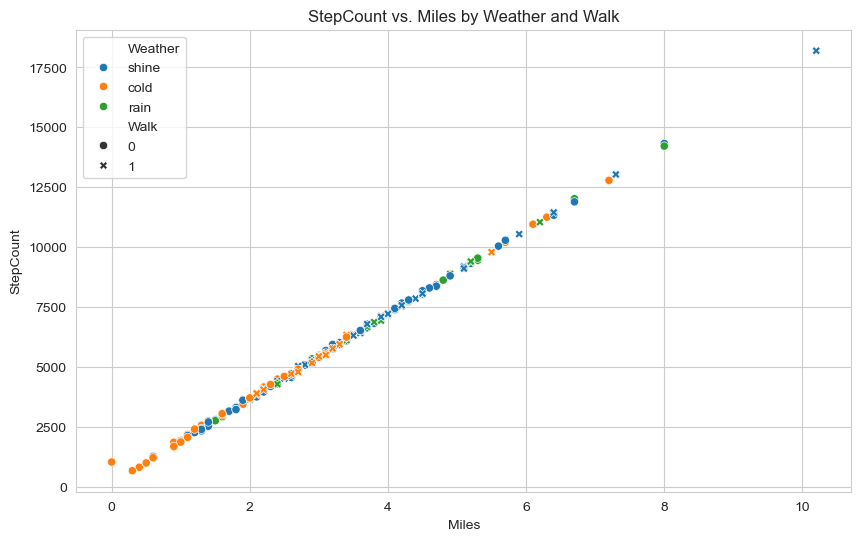

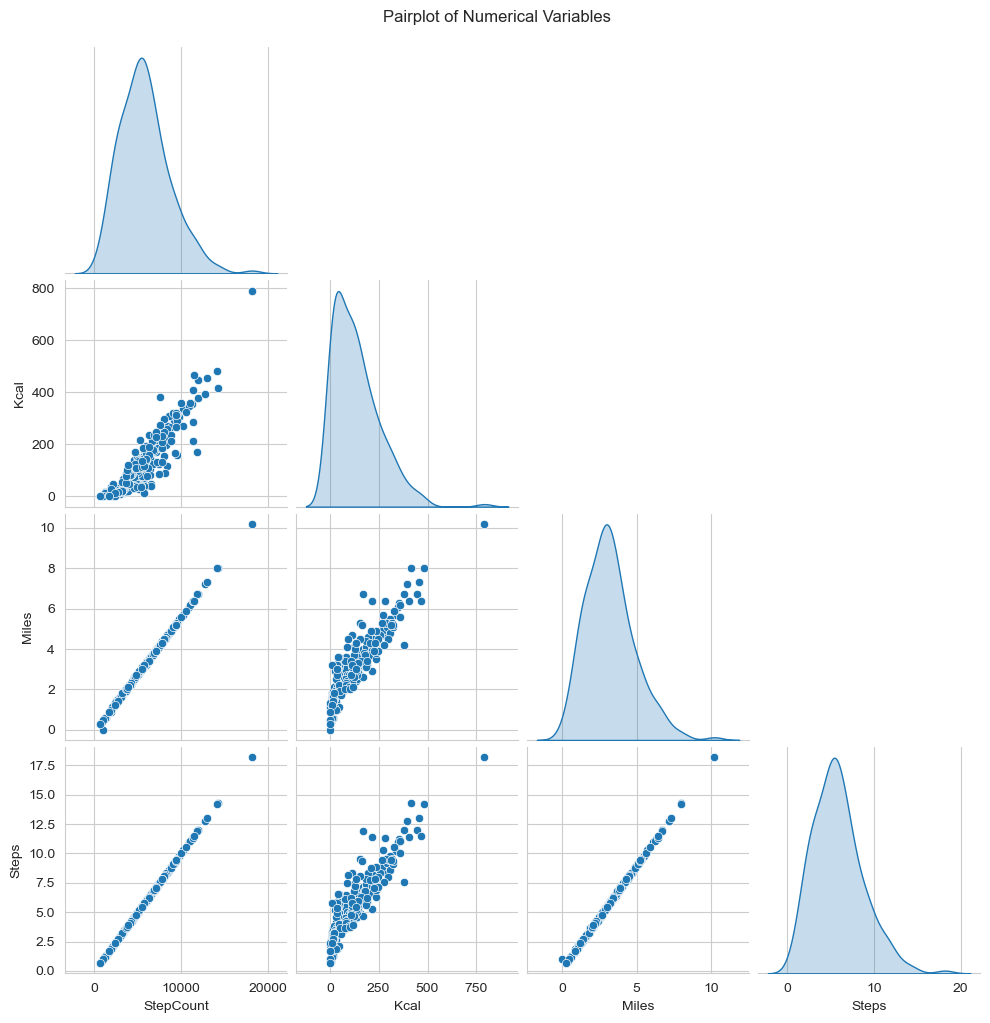


Average StepCount by Weather:
Weather
cold     4954.115942
rain     6631.057143
shine    6105.638655
Name: StepCount, dtype: float64

Average StepCount by Day of Week:
Day
F    6248.121212
M    6390.896552
R    6356.823529
S    5089.285714
T    6588.218750
U    3957.107143
W    6034.031250
Name: StepCount, dtype: float64


In [2]:
# EDA NOTEBOOK CODE FOR "WalkTheDogs.csv"

# 1. Imports and Setup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# For larger, clearer plots
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

# 2. Data Loading
data = pd.read_csv("WalkTheDogs.csv")


# 3. Basic Inspection 
print("Shape of dataset:", data.shape)
print("\nInfo:")
print(data.info())
print("\nPreview of data:")
print(data.head())

print("\nBasic Descriptive Stats:")
print(data.describe())

print("\nColumns in the dataset:", data.columns.tolist())

# 4. Checking for Missing Values
print("\nMissing Values per column:")
print(data.isnull().sum())

# === 5. Univariate Analysis ===

# Plot 1: Distribution of StepCount
plt.figure()
sns.histplot(data['StepCount'], bins=20, kde=True, color='blue')
plt.title("Distribution of StepCount")
plt.xlabel("StepCount (raw steps)")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Distribution of Kcal
plt.figure()
sns.histplot(data['Kcal'], bins=20, kde=True, color='green')
plt.title("Distribution of Kcal")
plt.xlabel("Kcal Burned")
plt.ylabel("Frequency")
plt.show()

# Plot 3: Distribution of Miles
plt.figure()
sns.histplot(data['Miles'], bins=20, kde=True, color='orange')
plt.title("Distribution of Miles")
plt.xlabel("Miles Walked")
plt.ylabel("Frequency")
plt.show()

# Plot 4: Count Plot of Weather
plt.figure()
sns.countplot(x='Weather', data=data, palette='Set2')
plt.title("Count of Weather Conditions")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.show()

# Plot 5: Count Plot of Day of the Week
plt.figure()
sns.countplot(x='Day', data=data, order=['M','T','W','R','F','S','U'], palette='Set1')
plt.title("Count of Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

# Plot 6: Boxplot - StepCount by Weather
plt.figure()
sns.boxplot(x='Weather', y='StepCount', data=data, palette='Set3')
plt.title("StepCount by Weather")
plt.xlabel("Weather")
plt.ylabel("StepCount")
plt.show()

# Plot 7: Scatter Plot - StepCount vs. Miles
plt.figure()
sns.scatterplot(x='Miles', y='StepCount', data=data, hue='Weather', style='Walk')
plt.title("StepCount vs. Miles by Weather and Walk")
plt.xlabel("Miles")
plt.ylabel("StepCount")
plt.show()

# Plot 8: Pairplot - Looking at relationships among numerical features
# We will include StepCount, Kcal, Miles, Steps
numerical_cols = ['StepCount', 'Kcal', 'Miles', 'Steps']
sns.pairplot(data[numerical_cols], corner=True, diag_kind='kde')
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# === 6. Some Groupby Stats ===
print("\nAverage StepCount by Weather:")
print(data.groupby('Weather')['StepCount'].mean())

print("\nAverage StepCount by Day of Week:")
print(data.groupby('Day')['StepCount'].mean())
